**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Apr 17 04:13:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/mydrive


**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.18 MiB | 23.08 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_

**3) Configure Darknet network for training YOLO V3**

In [ ]:
#!cp cfg/yolov3.cfg cfg/yolov3_training.cfg
!cp /content/drive/MyDrive/DL/yolov3/yolov3_testing.cfg cfg/yolov3_training.cfg

In [ ]:
!echo -e '' > data/obj.names
!echo -e '' > data/obj.data
!cp /content/drive/MyDrive/DL/yolov3/obj.names data/obj.names
!cp /content/drive/MyDrive/DL/yolov3/obj.data data/obj.data
#!mkdir data/obj

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-04-17 04:36:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  21.2MB/s    in 8.3s    

2023-04-17 04:36:40 (18.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /content/drive/MyDrive/DL/yolov3/img_data.zip -d data/obj

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/obj/251_G1_07_left_dashboard_sleep_20201217_182656_01802.jpg  
  inflating: data/obj/251_G1_07_left_dashboard_yawn_20201217_182656_01894.jpg  
  inflating: data/obj/251_G1_07_left_dashboard_yawn_20201217_182656_01898.jpg  
  inflating: data/obj/251_G1_07_left_frontside_normal_20201217_182656_00001.jpg  
  inflating: data/obj/251_G1_07_left_frontside_normal_20201217_182656_00029.jpg  
  inflating: data/obj/251_G1_07_left_frontside_sleep_20201217_182656_00354.jpg  
  inflating: data/obj/251_G1_07_left_frontside_sleep_20201217_182656_00386.jpg  
  inflating: data/obj/251_G1_07_left_frontside_yawn_20201217_182656_00470.jpg  
  inflating: data/obj/251_G1_07_left_frontside_yawn_20201217_182656_00482.jpg  
  inflating: data/obj/251_G1_07_left_leftside_normal_20201217_182656_00546.jpg  
  inflating: data/obj/251_G1_07_left_leftside_normal_20201217_182656_00554.jpg  
  inflating: data/obj/251_G1_07_left_leftside_sleep_20201217_182656_00658.j

In [ ]:
!unzip /content/drive/MyDrive/DL/yolov3/img_label.zip -d data/obj

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/obj/251_G1_07_left_dashboard_sleep_20201217_182656_01802.txt  
  inflating: data/obj/251_G1_07_left_dashboard_yawn_20201217_182656_01894.txt  
  inflating: data/obj/251_G1_07_left_dashboard_yawn_20201217_182656_01898.txt  
  inflating: data/obj/251_G1_07_left_frontside_normal_20201217_182656_00001.txt  
  inflating: data/obj/251_G1_07_left_frontside_normal_20201217_182656_00029.txt  
  inflating: data/obj/251_G1_07_left_frontside_sleep_20201217_182656_00354.txt  
  inflating: data/obj/251_G1_07_left_frontside_sleep_20201217_182656_00386.txt  
  inflating: data/obj/251_G1_07_left_frontside_yawn_20201217_182656_00470.txt  
  inflating: data/obj/251_G1_07_left_frontside_yawn_20201217_182656_00482.txt  
  inflating: data/obj/251_G1_07_left_leftside_normal_20201217_182656_00546.txt  
  inflating: data/obj/251_G1_07_left_leftside_normal_20201217_182656_00554.txt  
  inflating: data/obj/251_G1_07_left_leftside_sleep_20201217_182656_00658.t

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
#images_list = glob.glob("data/obj/*.png")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_img_list, val_img_list = train_test_split(images_list, test_size = 0.2, random_state=2000)

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(train_img_list)) 
file.close() 

In [ ]:
#Create validation.txt file
file = open("data/val.txt", "w") 
file.write("\n".join(val_img_list)) 
file.close() 

**6) Start the training**

In [ ]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 374 kB of archives.
After this operation, 1,342 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 dos2unix amd64 7.4.0-2 [374 kB]
Fetched 374 kB in 0s (3,787 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 122349 files and directories curre

In [ ]:
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/obj.names
!dos2unix ./data/obj.data
!dos2unix ./cfg/yolov3_training.cfg

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/val.txt to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./cfg/yolov3_training.cfg to Unix format...


In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 783003, rewritten_bbox = 0.053512 % 
]2;10126/10200: loss=0.1 hours left=0.2
 10126: 0.076668, 0.114403 avg loss, 0.000010 rate, 8.097752 seconds, 648064 images, 0.248800 hours left
Loaded: 0.000085 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.876982), count: 5, class_loss = 0.001430, iou_loss = 0.051310, total_loss = 0.052740 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 783008, rewritten_bbox = 0.053512 % 
v3 (mse loss, No

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/drive/MyDrive/DL/yolov3/yolov3_training_last.weights data/obj/img_data/001_G1_01_empty_dashboard_normal_20200917_182234_02144.jpg -out out

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
import cv2
import numpy as np

In [ ]:
!cp /content/drive/MyDrive/DL/yolov3/yolov3_training_final.weights ./weight/

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_training.cfg weight/yolov3_training_final.weights content/darknet/data/obj/159_G4_60_back_leftside_sleep_20201031_131636_00516.jpg -dont_show

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

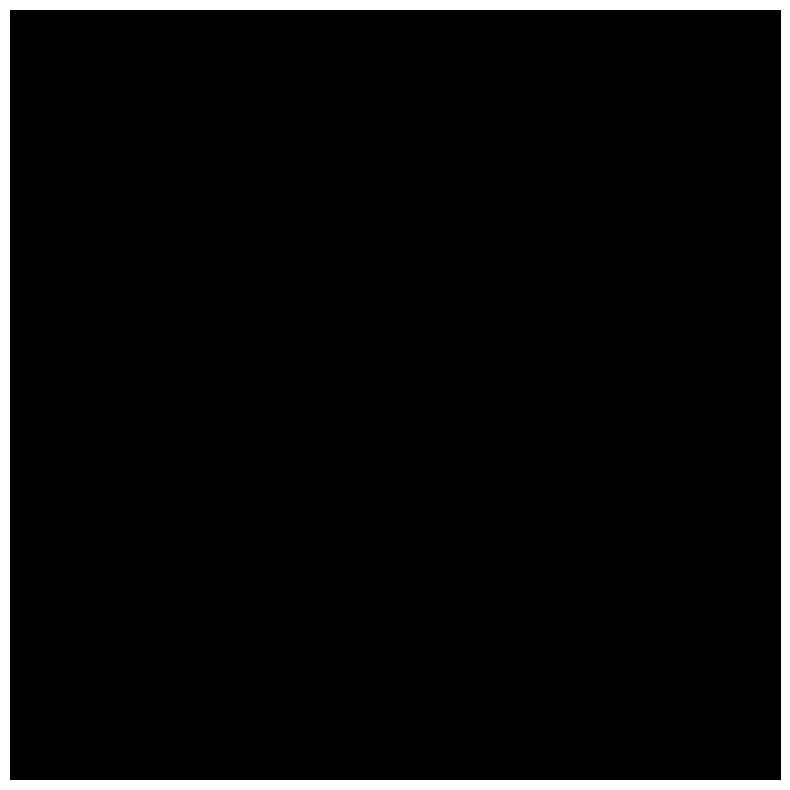

In [ ]:
imShow('predictions.jpg')

In [ ]:
#Create validation.txt file
file = open("/content/drive/MyDrive/DL/yolov3/val.txt", "w") 
file.write("\n".join(val_img_list)) 
file.close() 

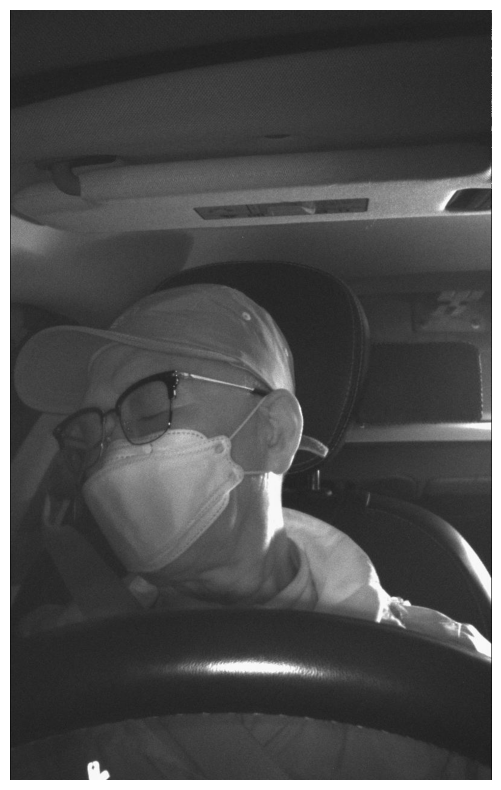

In [ ]:
imShow(val_img_list[0])